# Customer Churn Prediction

## 📌 Problem Statement

Customer churn refers to customers discontinuing a company’s service.
In subscription-based businesses, churn directly impacts revenue and long-term growth.

This project formulates churn prediction as a **binary classification problem**
and focuses not only on model performance, but also on translating predictive insights
into actionable outcomes such as targeted retention campaigns and personalized service recommendations.

## ❓ Why is Customer Churn Important?

- Acquiring new customers is significantly more expensive than retaining existing ones  
- Retaining customers increases long-term revenue and customer lifetime value  
- Early churn prediction enables targeted marketing and personalized retention strategies  

## 🔍 Why This Problem Matters

In subscription-based and service-oriented businesses, customer churn directly impacts recurring revenue, customer lifetime value, and long-term growth.  
Identifying customers who are likely to churn allows companies to intervene early with data-driven retention strategies.

From a product and engineering perspective, churn prediction represents a realistic end-to-end machine learning problem that involves:

- Working with real-world, noisy customer data  
- Designing meaningful features that reflect customer behavior  
- Selecting appropriate evaluation metrics aligned with business goals  
- Building models that can be integrated into decision-support systems  

Early churn prediction enables targeted marketing, personalized retention strategies,and more efficient allocation of customer retention budgets



## 📊 Class Imbalance Analysis

Before building machine learning models, it is important to examine the distribution of the target variable.

The dataset shows class imbalance, which makes accuracy an unreliable metric.
For this reason, evaluation metrics such as **F1-score and recall**
are prioritized over accuracy throughout the modeling process.


In [1]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
# Churn distribution (counts and percentages)
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) *100

churn_summary = pd.DataFrame({
    'Count': churn_counts,
    'Percentage (%)': churn_percentages.round(2)
})

churn_summary


,Count,Percentage (%)
Churn,,
No,5174,73.46
Yes,1869,26.54


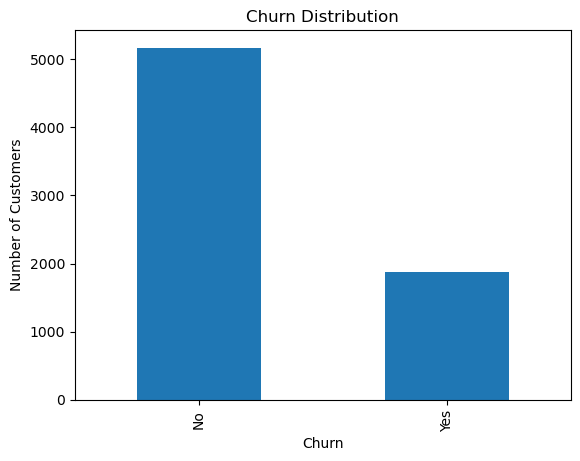

In [5]:
import matplotlib.pyplot as plt

plt.figure()
churn_counts.plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


### Feature Encoding Considerations

The dataset contains different types of categorical features that require different encoding strategies during preprocessing.

- Several features are **binary categorical variables** with Yes/No values, such as:
  - Partner, Dependents, PhoneService, PaperlessBilling, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies  
  These features can be encoded as 0/1.

- Some categorical features have **multiple categories**, including:
  - Contract, InternetService, PaymentMethod, MultipleLines  
  These features require multi-class encoding techniques (e.g., one-hot encoding).

- Although represented numerically, **SeniorCitizen** is a binary indicator (0/1) and is therefore treated as a categorical feature rather than a continuous numerical variable.

Encoding decisions are made to preserve the semantic meaning of each feature while ensuring compatibility with machine learning models.

## 🔎 Feature Selection for EDA

Encoding decisions are made to preserve the semantic meaning of each featurewhile ensuring compatibility with machine learning models.

- **Tenure** was included to capture customer loyalty and retention dynamics, as shorter customer lifetimes are commonly associated with higher churn risk.

- **MonthlyCharges** was selected to analyze pricing and cost sensitivity, examining how variations in monthly fees relate to customer churn patterns.

- **Contract** was included to evaluate the impact of contract duration and commitment level on churn behavior, as customers with month-to-month contracts typically exhibit higher churn rates.

- **InternetService** was included to analyze how different internet connection types (DSL, fiber optic, or no internet) relate to churn patterns and customer satisfaction.

- **PaymentMethod** was selected to assess the relationship between billing mechanisms and churn behavior, particularly the tendency of customers using electronic checks to exhibit higher churn rates.

- **PaperlessBilling** was included to examine whether digital billing preferences are associated with different churn tendencies compared to traditional billing methods.



In [6]:
print("Min:", df["tenure"].min())
print("Max:", df["tenure"].max())

Min: 0
Max: 72


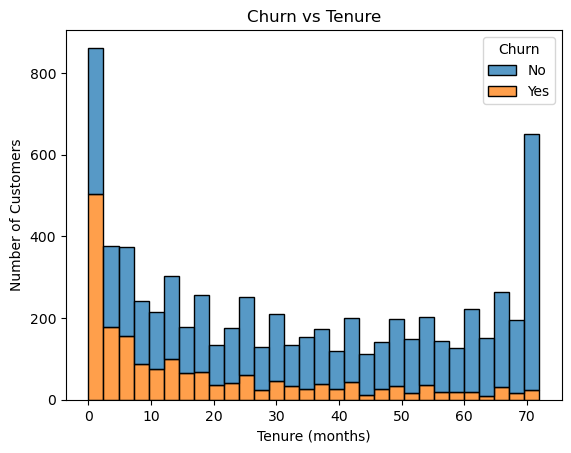

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.histplot(
    data=df,
    x="tenure",
    hue="Churn",
    bins=30,
    multiple="stack"
)
plt.title("Churn vs Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()

**Insight:** Customers with shorter tenure are more likely to churn.

In [8]:
minMonthlyCharge=df['MonthlyCharges'].min()
print("Min:",minMonthlyCharge)
maxMonthlyCharge=df['MonthlyCharges'].max()
print("Max:",maxMonthlyCharge)
print("Range: ",maxMonthlyCharge-minMonthlyCharge)

Min: 18.25
Max: 118.75
Range:  100.5


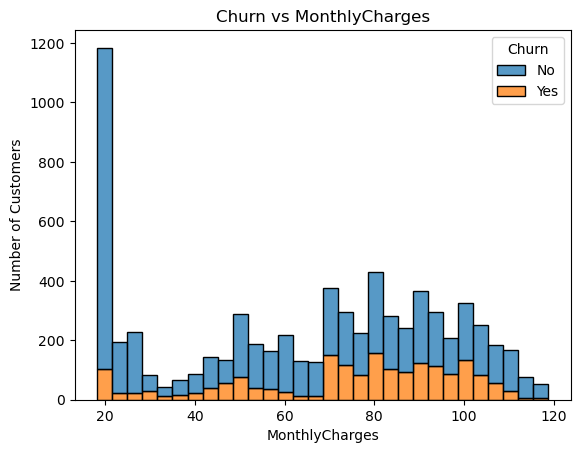

In [9]:
plt.figure()
sns.histplot(
    data=df,
    x="MonthlyCharges",
    hue="Churn",
    bins=30,
    multiple="stack"
    
)
plt.title("Churn vs MonthlyCharges")
plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customers")
plt.show()

**Insight:** Churn appears more concentrated among customers with higher monthly charges.

In [10]:
df['charge_bin'] = pd.cut(
    df['MonthlyCharges'],
    bins=[0,30,50,70,90,110,130]
)

churn_rate = (
    df.groupby('charge_bin',observed=True)['Churn']
      .value_counts(normalize=True)
      .rename('rate')
      .reset_index()
)

churn_rate[churn_rate['Churn'] == "Yes"]



,charge_bin,Churn,rate
1,"(0, 30]",Yes,0.098004
3,"(30, 50]",Yes,0.308050
5,"(50, 70]",Yes,0.207580
7,"(70, 90]",Yes,0.377983
9,"(90, 110]",Yes,0.355643
11,"(110, 130]",Yes,0.130233


In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_bin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(0, 30]"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,"(50, 70]"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(50, 70]"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(30, 50]"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(70, 90]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,"(70, 90]"
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,"(90, 110]"
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,"(0, 30]"
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,"(70, 90]"


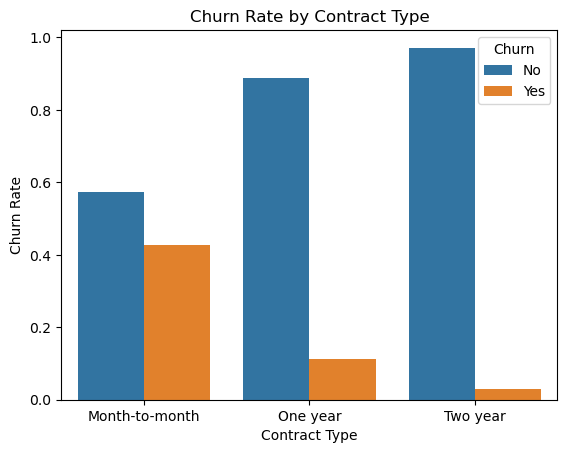

In [12]:
plt.figure()

churn_by_contract = (
    df.groupby("Contract")["Churn"]
    .value_counts(normalize=True)
    .rename("rate")
    .reset_index()
)

sns.barplot(
    data=churn_by_contract,
    x="Contract",
    y="rate",
    hue="Churn"
)

plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.show()


In [13]:
churn_rate_table=(
    df.groupby("Contract")["Churn"]
    .value_counts(normalize=True)
    .loc[:,"Yes"]
    .reset_index()
    .rename(columns={"Churn":"Churn Rate"})
)
churn_rate_table

,Contract,proportion
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


**Contract Type vs Churn**

This visualization demonstrates a strong relationship between contract duration and customer churn.
Customers on month-to-month contracts exhibit the highest churn rate, while churn decreases
substantially for one-year contracts and is lowest among two-year contract customers.
This indicates that longer contractual commitments are associated with higher customer retention
and reduced churn risk.



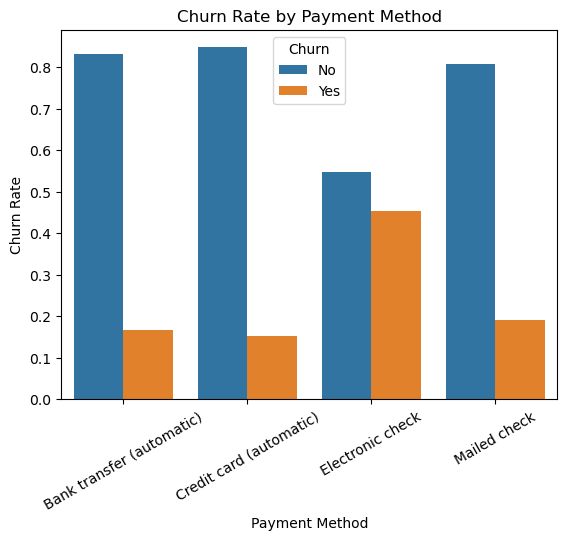

In [14]:
plt.figure()

churn_by_payment = (
    df.groupby("PaymentMethod")["Churn"]
    .value_counts(normalize=True)
    .rename("rate")
    .reset_index()
)

sns.barplot(
    data=churn_by_payment,
    x="PaymentMethod",
    y="rate",
    hue="Churn"
)

plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.xticks(rotation=30)
plt.show()


**Payment Method vs Churn**

This visualization shows that customers using electronic check payment methods
tend to exhibit higher churn rates compared to those using automatic payment options
such as credit cards or bank transfers.
Automatic payment methods are associated with lower churn, suggesting that billing
convenience and payment stability may play an important role in customer retention.



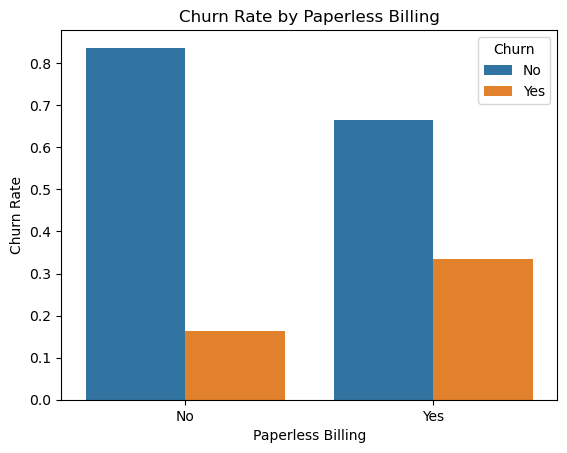

In [15]:
plt.figure()

churn_by_paperless = (
    df.groupby("PaperlessBilling")["Churn"]
    .value_counts(normalize=True)
    .rename("rate")
    .reset_index()
)

sns.barplot(
    data=churn_by_paperless,
    x="PaperlessBilling",
    y="rate",
    hue="Churn"
)

plt.title("Churn Rate by Paperless Billing")
plt.xlabel("Paperless Billing")
plt.ylabel("Churn Rate")
plt.show()


**Paperless Billing vs Churn**

The plot indicates that customers using paperless billing exhibit higher churn rates
compared to those receiving traditional paper bills.
This may suggest that digitally billed customers represent a more flexible and
less contract-bound segment, which could make them more susceptible to churn.


## EDA Summary

The exploratory data analysis reveals that customer churn is strongly influenced by contract duration, customer tenure, and pricing-related factors.
Month-to-month contracts, higher monthly charges, electronic payment methods, and paperless billing are all associated with increased churn risk.

These findings directly informed feature selection and preprocessing decisions
in the subsequent modeling phase.



### PREPROCESSING

In [16]:
df=df.drop(columns=["customerID"]) 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   object  
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   object  
 16  PaymentMethod     7043 n

**Note:** `TotalCharges` is stored as an object but represents numerical data and will be converted to `float` during preprocessing.

In [18]:
df["TotalCharges"] = pd.to_numeric(
    df["TotalCharges"], errors="coerce"
)

In [19]:
df["TotalCharges"].isna().sum()

11

In [20]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].median())

In [21]:
df["TotalCharges"].dtype

dtype('float64')

In [22]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
#The target variable was encoded as binary (1 = churn, 0 = non-churn).

In [23]:
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]

for col in binary_cols:
    df[col] = df[col].map({
        "Yes": 1, "No": 0,
        "Male": 1, "Female": 0
    }) 

In [24]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,"charge_bin_(30, 50]","charge_bin_(50, 70]","charge_bin_(70, 90]","charge_bin_(90, 110]","charge_bin_(110, 130]"
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,1,0,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,1,0,1,0,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,0,0,1,0,0,1,0,0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,1,0,1,0,0,0,0,0,1,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,1,0,0,0,0,0,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,1,0,0,1,0,0


In [27]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [28]:
##Validation set for hyperparameter
X_tr,X_val,y_tr,y_val=train_test_split(
    X_train, y_train, test_size=0.25, stratify=y_train, random_state=42
)

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def threshold_analysis(y_true, y_prob, thresholds, verbose=False):
    results = []

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        results.append({
            "threshold": t,
            "precision": precision,
            "recall": recall,
            "f1": f1
        })

        if verbose:
            print(f"Threshold: {t:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1:.2f}")

    best = max(results, key=lambda x: x["f1"])
    return best, results

thresholds = np.arange(0.1, 0.9, 0.05)

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_tr_sm, y_tr_sm = smote.fit_resample(X_tr, y_tr)

print(y_tr.value_counts())
print(y_tr_sm.value_counts())


Churn
0    3104
1    1121
Name: count, dtype: int64
Churn
0    3104
1    3104
Name: count, dtype: int64


In [31]:
## Baseline Model: Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline=Pipeline(
    [("scaler",StandardScaler()),
     ("model", LogisticRegression(max_iter=1000))
    ])

pipeline.fit(X_tr_sm, y_tr_sm)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [32]:
y_pred = pipeline.predict(X_val)

In [33]:
y_prob = pipeline.predict_proba(X_val)[:, 1]

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.57      0.64      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409



In [35]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred)
conf_matrix


array([[853, 182],
       [134, 240]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
accuracy


0.7757274662881476

In [37]:
best_lr, all_results_lr = threshold_analysis(
    y_val,
    y_prob,
    thresholds,
    verbose=True
)

best_lr


Threshold: 0.10 | Precision: 0.39 | Recall: 0.93 | F1: 0.55
Threshold: 0.15 | Precision: 0.41 | Recall: 0.90 | F1: 0.57
Threshold: 0.20 | Precision: 0.43 | Recall: 0.86 | F1: 0.58
Threshold: 0.25 | Precision: 0.45 | Recall: 0.82 | F1: 0.58
Threshold: 0.30 | Precision: 0.47 | Recall: 0.80 | F1: 0.59
Threshold: 0.35 | Precision: 0.48 | Recall: 0.75 | F1: 0.59
Threshold: 0.40 | Precision: 0.50 | Recall: 0.70 | F1: 0.59
Threshold: 0.45 | Precision: 0.53 | Recall: 0.68 | F1: 0.60
Threshold: 0.50 | Precision: 0.57 | Recall: 0.64 | F1: 0.60
Threshold: 0.55 | Precision: 0.59 | Recall: 0.58 | F1: 0.59
Threshold: 0.60 | Precision: 0.61 | Recall: 0.52 | F1: 0.56
Threshold: 0.65 | Precision: 0.64 | Recall: 0.44 | F1: 0.52
Threshold: 0.70 | Precision: 0.66 | Recall: 0.36 | F1: 0.46
Threshold: 0.75 | Precision: 0.68 | Recall: 0.27 | F1: 0.38
Threshold: 0.80 | Precision: 0.68 | Recall: 0.14 | F1: 0.23
Threshold: 0.85 | Precision: 0.77 | Recall: 0.05 | F1: 0.09


{'threshold': 0.5000000000000001,
 'precision': 0.5687203791469194,
 'recall': 0.6417112299465241,
 'f1': 0.6030150753768844}

In [39]:
best_threshold = best_lr["threshold"]

y_pred = (y_prob >= best_threshold).astype(int)


In [40]:
y_pred_bt = (y_prob >= best_threshold).astype(int)
print(y_pred_bt)

[1 1 1 ... 0 1 0]


In [41]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred_bt)
conf_matrix


array([[853, 182],
       [134, 240]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report, precision_score, recall_score
print(classification_report(y_val,y_pred_bt))


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.57      0.64      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409



### Baseline Model Summary
Logistic regression was selected as a baseline model, with evaluation focused on ROC-AUC and recall due to class imbalance. The results highlight the importance of threshold selection and serve as a solid reference point for subsequent model improvements. However, its linear decision boundary limits its ability to capture complex feature interactions, motivating the exploration of ensemble-based models.

## Model 1: Decision Tree Classifier

To address the limitations of linear models, non-linear classifiers were evaluated,
starting with decision trees.
Decision trees are capable of modeling non-linear relationships and feature interactions,
while also providing interpretability through rule-based decision paths.


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


param_grid_dt = {
    "max_depth": [3, 5, 7, None],
    "min_samples_leaf": [10, 30, 50,70]
}

dt=DecisionTreeClassifier(
    random_state=42
)


grid_dt=GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring="f1",
    cv=5,
    n_jobs=-1
    
)

grid_dt.fit(X_tr_sm,y_tr_sm)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [10, 30, 50, 70]},
             scoring='f1')

In [44]:
grid_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 70}

In [45]:
dt_model = grid_dt.best_estimator_

In [46]:
y_prob_dt = dt_model.predict_proba(X_val)[:, 1]

best_dt, all_results_dt = threshold_analysis(
    y_val,
    y_prob_dt,
    thresholds,
    verbose=True 
)

best_dt

Threshold: 0.10 | Precision: 0.38 | Recall: 0.94 | F1: 0.54
Threshold: 0.15 | Precision: 0.40 | Recall: 0.92 | F1: 0.56
Threshold: 0.20 | Precision: 0.42 | Recall: 0.90 | F1: 0.57
Threshold: 0.25 | Precision: 0.44 | Recall: 0.85 | F1: 0.58
Threshold: 0.30 | Precision: 0.44 | Recall: 0.85 | F1: 0.58
Threshold: 0.35 | Precision: 0.49 | Recall: 0.77 | F1: 0.60
Threshold: 0.40 | Precision: 0.51 | Recall: 0.77 | F1: 0.61
Threshold: 0.45 | Precision: 0.51 | Recall: 0.69 | F1: 0.59
Threshold: 0.50 | Precision: 0.52 | Recall: 0.65 | F1: 0.58
Threshold: 0.55 | Precision: 0.53 | Recall: 0.61 | F1: 0.57
Threshold: 0.60 | Precision: 0.55 | Recall: 0.57 | F1: 0.56
Threshold: 0.65 | Precision: 0.56 | Recall: 0.52 | F1: 0.54
Threshold: 0.70 | Precision: 0.57 | Recall: 0.48 | F1: 0.52
Threshold: 0.75 | Precision: 0.57 | Recall: 0.48 | F1: 0.52
Threshold: 0.80 | Precision: 0.57 | Recall: 0.48 | F1: 0.52
Threshold: 0.85 | Precision: 0.57 | Recall: 0.48 | F1: 0.52


{'threshold': 0.40000000000000013,
 'precision': 0.5088652482269503,
 'recall': 0.767379679144385,
 'f1': 0.6119402985074627}

In [47]:
best_threshold_dt = best_dt["threshold"]
y_pred_dt = (y_prob_dt >= best_threshold_dt).astype(int)


from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)
conf_matrix_dt


array([[758, 277],
       [ 87, 287]], dtype=int64)

In [49]:
print(classification_report(y_val, y_pred_dt))


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409



## Model 2: Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision treesusing bootstrap sampling and feature randomness.
By aggregating predictions from many trees, it reduces variance and improves
generalization compared to single-tree models.

In the context of customer churn prediction, Random Forest is particularly well-suited
for capturing non-linear relationships and complex feature interactions commonly
observed in structured customer data.
Additionally, its robustness to overfitting makes it a strong candidate for improving
performance over baseline and single-tree models.


In [51]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf={
    "max_depth":[5,7,None],
    "min_samples_leaf":[10,30,50],
    "n_estimators":[200,300]
}

rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

grid_rf=GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_tr_sm, y_tr_sm)

grid_rf.best_params_


{'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 300}

In [52]:
rf_model=grid_rf.best_estimator_

In [53]:
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]

best_rf, all_results_rf = threshold_analysis(
    y_val,
    y_prob_rf,
    thresholds
)

best_rf


{'threshold': 0.5000000000000001,
 'precision': 0.546,
 'recall': 0.7299465240641712,
 'f1': 0.6247139588100686}

For Random Forest, the optimal threshold remained close to 0.5,
indicating that the model already provides well-calibrated probability estimates.

In [54]:
best_threshold_rf = best_rf["threshold"]
y_pred_rf = (y_prob_rf >= best_threshold_rf).astype(int)


from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
conf_matrix_rf


array([[808, 227],
       [101, 273]], dtype=int64)

In [56]:
print(classification_report(y_val, y_pred_rf))


              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.55      0.73      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



### Model 3: XGBoost with SMOTE

In [60]:
X_tr_sm_XGB = X_tr_sm.copy()
X_val_XGB = X_val.copy()

X_tr_sm_XGB.columns = (
    X_tr_sm_XGB.columns
    .astype(str)
    .str.replace(r"[\[\]\(\),]", "_", regex=True)
)

X_val_XGB.columns = (
    X_val_XGB.columns
    .astype(str)
    .str.replace(r"[\[\]\(\),]", "_", regex=True)
)

XGBoost requires feature names to be valid strings without special characters.
Therefore, column names were sanitized to ensure compatibility with the XGBoost API.

In [61]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

param_grid_xgb={
    "n_estimators": [300, 500],
    "max_depth": [3, 5,7,None],
    "learning_rate": [0.03, 0.05,0.1],
    "subsample": [0.7,0.8,1.0],
    "colsample_bytree": [0.8]
}

grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring="f1",  
    cv=5,
    n_jobs=-1
)

grid_xgb.fit(X_tr_sm_XGB, y_tr_sm)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.03, 0.05, 0.1],
                         'max_depth': [3, 5, 7, None],
                         'n_estimators': [300, 500],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='f1')

In [62]:
grid_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.03,
 'max_depth': 7,
 'n_estimators': 300,
 'subsample': 0.7}

In [63]:
xgb_best=grid_xgb.best_estimator_

In [64]:
y_prob_xgb = xgb_best.predict_proba(X_val_XGB)[:, 1]

best_xgb, all_results_xgb = threshold_analysis(
    y_val,
    y_prob_xgb,
    thresholds
)

best_xgb



{'threshold': 0.30000000000000004,
 'precision': 0.5070422535211268,
 'recall': 0.7700534759358288,
 'f1': 0.6114649681528662}

In [65]:
best_threshold_xgb = best_xgb["threshold"]

y_pred_xgb = (y_prob_xgb >= best_threshold_xgb).astype(int)

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

conf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)
conf_matrix_xgb


array([[755, 280],
       [ 86, 288]], dtype=int64)

In [67]:
print(classification_report(y_val, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1035
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409



In [68]:
### Model 3: XGBoost with scale_pos_weight without SMOTE

In [69]:
X_tr_XGB = X_tr.copy()

X_tr_XGB.columns = (
    X_tr_XGB.columns
    .astype(str)
    .str.replace(r"[\[\]\(\),]", "_", regex=True)
)

In [70]:
from xgboost import XGBClassifier
scale_pos_weight_XGB=(y_tr==0).sum()/(y_tr==1).sum()
xgb_model2=XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight_XGB,
    n_jobs=-1
)

param_grid_xgb2={
    "n_estimators": [300, 500],
    "max_depth": [3, 5,7,None],
    "learning_rate": [0.03, 0.05,0.1],
    "subsample": [0.7,0.8,1.0],
    "colsample_bytree": [0.8]
}

grid_xgb2 = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring="f1",  
    cv=5,
    n_jobs=-1
)

grid_xgb2.fit(X_tr_XGB, y_tr)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8],
                         'learning_rate': [0.03, 0.05, 0.1],
                         'max_depth': [3, 5, 7, None],
                         'n_estimators': [300, 500],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='f1')

In [71]:
grid_xgb2.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.03,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 0.7}

In [72]:
xgb_best2=grid_xgb2.best_estimator_

In [73]:
y_prob_xgb2 = xgb_best2.predict_proba(X_val_XGB)[:, 1]

best_xgb2, all_results_xgb2 = threshold_analysis(
    y_val,
    y_prob_xgb2,
    thresholds,
    verbose=True 
)

best_xgb2


Threshold: 0.10 | Precision: 0.40 | Recall: 0.93 | F1: 0.56
Threshold: 0.15 | Precision: 0.44 | Recall: 0.90 | F1: 0.59
Threshold: 0.20 | Precision: 0.47 | Recall: 0.85 | F1: 0.60
Threshold: 0.25 | Precision: 0.50 | Recall: 0.82 | F1: 0.62
Threshold: 0.30 | Precision: 0.53 | Recall: 0.76 | F1: 0.62
Threshold: 0.35 | Precision: 0.58 | Recall: 0.72 | F1: 0.64
Threshold: 0.40 | Precision: 0.61 | Recall: 0.64 | F1: 0.63
Threshold: 0.45 | Precision: 0.66 | Recall: 0.59 | F1: 0.62
Threshold: 0.50 | Precision: 0.67 | Recall: 0.51 | F1: 0.58
Threshold: 0.55 | Precision: 0.69 | Recall: 0.42 | F1: 0.52
Threshold: 0.60 | Precision: 0.70 | Recall: 0.34 | F1: 0.46
Threshold: 0.65 | Precision: 0.74 | Recall: 0.28 | F1: 0.41
Threshold: 0.70 | Precision: 0.79 | Recall: 0.23 | F1: 0.36
Threshold: 0.75 | Precision: 0.84 | Recall: 0.17 | F1: 0.29
Threshold: 0.80 | Precision: 0.86 | Recall: 0.10 | F1: 0.18
Threshold: 0.85 | Precision: 0.76 | Recall: 0.03 | F1: 0.07


{'threshold': 0.3500000000000001,
 'precision': 0.5769230769230769,
 'recall': 0.7219251336898396,
 'f1': 0.6413301662707839}

In [74]:
best_threshold_xgb2 = best_xgb2["threshold"]
y_pred_xgb2 = (y_prob_xgb2 >= best_threshold_xgb2).astype(int)

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

conf_matrix_xgb2 = confusion_matrix(y_val, y_pred_xgb2)
conf_matrix_xgb2


array([[837, 198],
       [104, 270]], dtype=int64)

In [75]:
print(classification_report(y_val, y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1035
           1       0.58      0.72      0.64       374

    accuracy                           0.79      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.79      0.79      1409

